# Transformações de intensidade

## Importa as bibliotecas necessárias

In [1]:
%matplotlib notebook
import numpy as np

from skimage import util, color

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

SMALL_SIZE = 7
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

# Histograma

Histograma de uma imagem digital com níveis de cinza no intervalo [0, L - 1] é uma função discreta

$$h(r_k) = n_k$$

* $r_k$ : k-ésimo valor de intensidade
* $n_k$ : número de pixels com o valor $r_k$ na imagem

### Histograma de uma imagem simples

In [2]:
# Gera uma imagem com 8 x 8 pixels e 8 níveis de intensidade
img_simple_rgb = np.random.randint(0, 8, size=(8, 8, 3), dtype=np.uint8)

# Imprime informações sobre a imagem
print(img_simple_rgb.shape, img_simple_rgb.dtype, img_simple_rgb.min(), img_simple_rgb.max())

(8, 8, 3) uint8 0 7


In [3]:
hist_simple_r, bins = np.histogram(img_simple_rgb[:,:,0], bins=8, range=(0, 7))
hist_simple_g, bins = np.histogram(img_simple_rgb[:,:,1], bins=8, range=(0, 7))
hist_simple_b, bins = np.histogram(img_simple_rgb[:,:,2], bins=8, range=(0, 7))

# Imprime os valores do histograma
## print(hist_simple_r)
## print(bins)

In [4]:
# Histograma normalizado
hist_simple_r_norm = hist_simple_r / (img_simple_rgb.shape[0] * img_simple_rgb.shape[1])
hist_simple_g_norm = hist_simple_g / (img_simple_rgb.shape[0] * img_simple_rgb.shape[1])
hist_simple_b_norm = hist_simple_b / (img_simple_rgb.shape[0] * img_simple_rgb.shape[1])

# Imprime os valores do histograma
### print(hist)
### print(bins)

<IPython.core.display.Javascript object>


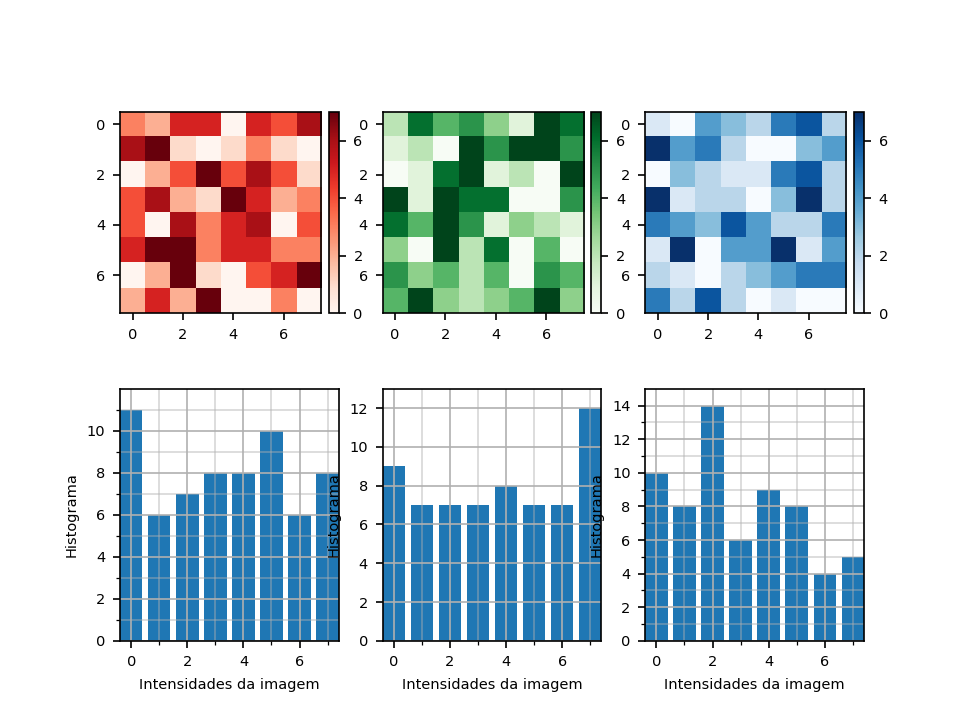

In [5]:
fig, ((ax1, ax5, ax6), (ax2, ax3, ax4)) = plt.subplots(2,3)
im_0 = ax1.imshow(img_simple_rgb[:,:,0], cmap='Reds', vmin=0, vmax=7)
# Barra de cores
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_0, cax=cax)

im_1 = ax5.imshow(img_simple_rgb[:,:,1], cmap='Greens',  vmin=0, vmax=7)
# Barra de cores
divider = make_axes_locatable(ax5)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_1, cax=cax)

im_2 = ax6.imshow(img_simple_rgb[:,:,2], cmap='Blues',  vmin=0, vmax=7)
# Barra de cores
divider = make_axes_locatable(ax6)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_2, cax=cax)

ch_0 = ax2.bar(np.arange(0, 8), hist_simple_r)
ax2.autoscale(enable=True, axis='both', tight=True)
#ax = fig.get_gca()
ax2.set_xticks(np.arange(0, 8, 2))
ax2.set_xticks(np.arange(0, 8, 1), minor=True)
ax2.set_yticks(np.arange(0, hist_simple_r.max()+0.01, 2), minor=False)
ax2.set_yticks(np.arange(0, hist_simple_r.max()+0.01, 1), minor=True)
#ax.set_aspect('equal')
ax2.grid(which='major', alpha=1.0)
ax2.grid(which='minor', alpha=0.5)
ax2.set_ylim(0, hist_simple_r.max()+1)
ax2.set_xlabel('Intensidades da imagem', fontsize='medium')
ax2.set_ylabel('Histograma', fontsize='medium')

ch_1 = ax3.bar(np.arange(0, 8), hist_simple_g)
ax3.autoscale(enable=True, axis='both', tight=True)
#ax = fig.get_gca()
ax3.set_xticks(np.arange(0, 8, 2))
ax3.set_xticks(np.arange(0, 8, 1), minor=True)
ax3.set_yticks(np.arange(0, hist_simple_g.max()+0.01, 2), minor=False)
ax3.set_yticks(np.arange(0, hist_simple_g.max()+0.01, 2), minor=True)
#ax.set_aspect('equal')
ax3.grid(which='major', alpha=1.0)
ax3.grid(which='minor', alpha=0.5)
ax3.set_ylim(0, hist_simple_g.max()+1)
ax3.set_xlabel('Intensidades da imagem', fontsize='medium')
ax3.set_ylabel('Histograma', fontsize='medium')

ch_2 = ax4.bar(np.arange(0, 8), hist_simple_b)
ax4.autoscale(enable=True, axis='both', tight=True)
#ax = fig.get_gca()
ax4.set_xticks(np.arange(0, 8, 2))
ax4.set_xticks(np.arange(0, 8, 1), minor=True)
ax4.set_yticks(np.arange(0, hist_simple_b.max()+0.1, 2), minor=False)
ax4.set_yticks(np.arange(0, hist_simple_b.max()+0.1, 1), minor=True)
#ax.set_aspect('equal')
ax4.grid(which='major', alpha=1.0)
ax4.grid(which='minor', alpha=0.5)
ax4.set_ylim(0, hist_simple_b.max()+1)
ax4.set_xlabel('Intensidades da imagem', fontsize='medium')
ax4.set_ylabel('Histograma', fontsize='medium')

plt.show()

### Histograma de uma imagem

In [6]:
img_gray = plt.imread('./images/boat.tif')

print(img_gray.shape, img_gray.dtype, img_gray.min(), img_gray.max())

(512, 512) uint8 0 239


In [7]:
hist, bins = np.histogram(img_gray, bins=256, range=(0, 256))

# Imprime os valores do histograma
### print(hist)
### print(bins)

Plota a imagem na tela

<IPython.core.display.Javascript object>


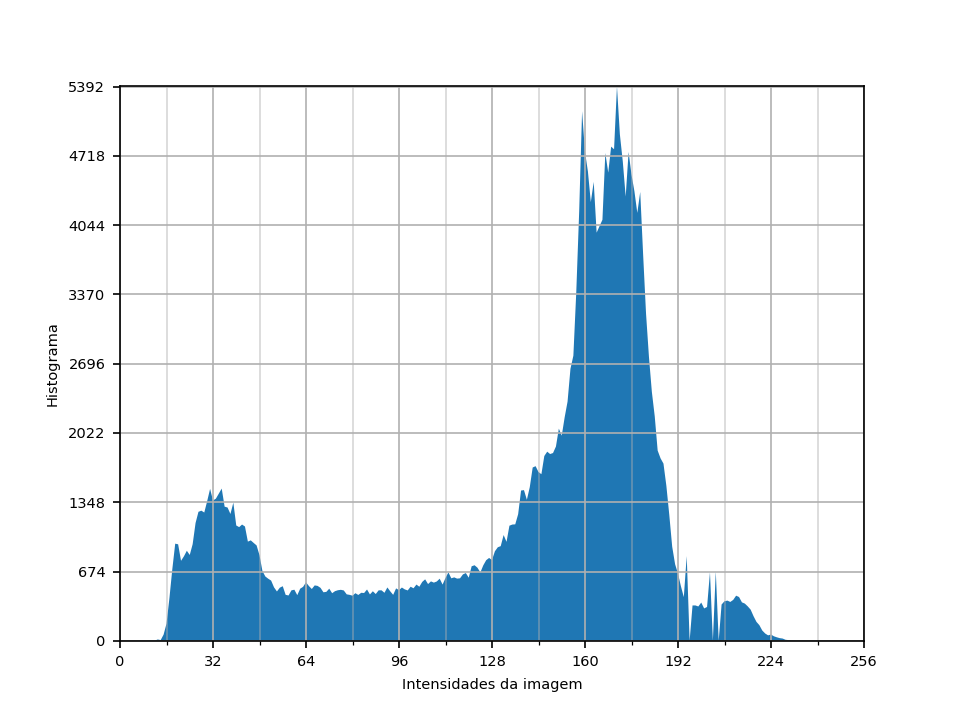

In [8]:
fig = plt.figure()
# plt.bar(bins[:-1], hist, width=bins[1]-bins[0], ec="black")
plt.fill_between(bins[:-1], hist)
plt.autoscale(enable=True, axis='both', tight=True)
ax = fig.gca()
ax.set_xticks(np.arange(0, 257, 32))
ax.set_xticks(np.arange(0, 257, 16), minor=True)
ax.set_yticks(np.arange(0, hist.max(), hist.max()//8), minor=False)
ax.set_yticks(np.arange(0, hist.max(), hist.max()//4), minor=True)
#ax.set_aspect('equal')
ax.grid(which='major', alpha=1.0)
ax.grid(which='minor', alpha=0.5)
ax.set_ylim(0, hist.max())
ax.set_xlabel('Intensidades da imagem', fontsize='medium')
ax.set_ylabel('Histograma', fontsize='medium')
plt.show()

#### Histograma normalizado

In [9]:
hist_norm = hist / (img_gray.shape[0] * img_gray.shape[1])

### hist_norm

<IPython.core.display.Javascript object>


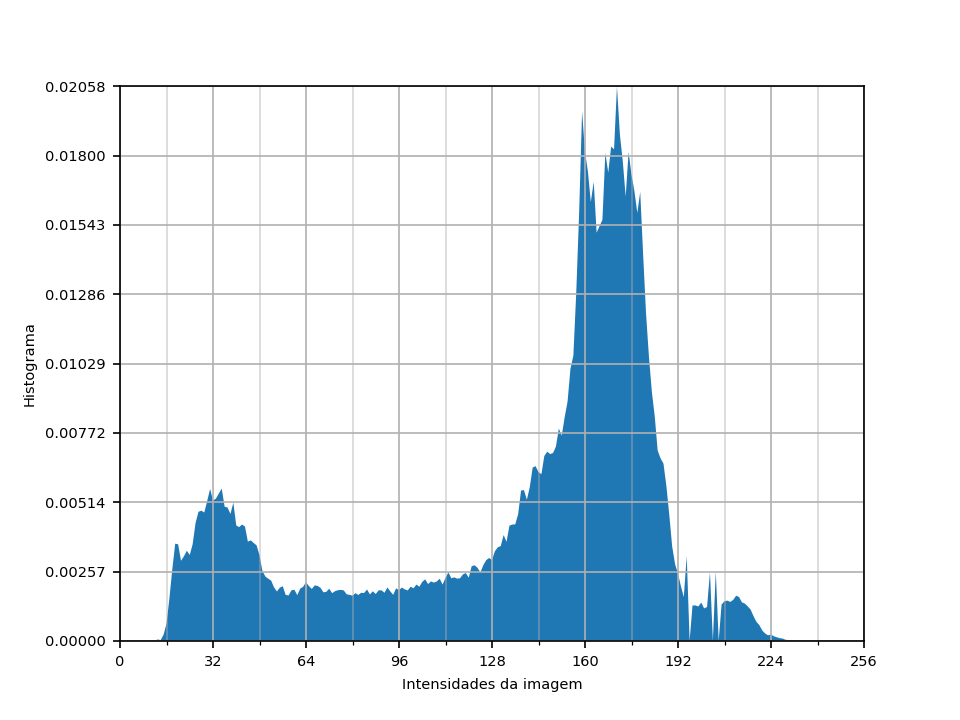

In [10]:
fig = plt.figure()
# plt.bar(bins[:-1], hist, width=bins[1]-bins[0], ec="black")
plt.fill_between(bins[:-1], hist_norm)
plt.autoscale(enable=True, axis='both', tight=True)
ax = fig.gca()
ax.set_xticks(np.arange(0, 257, 32))
ax.set_xticks(np.arange(0, 257, 16), minor=True)
ax.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/8), minor=False)
ax.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/4), minor=True)
#ax.set_aspect('equal')
ax.grid(which='major', alpha=1.0)
ax.grid(which='minor', alpha=0.5)
ax.set_ylim(0, hist_norm.max())
ax.set_xlabel('Intensidades da imagem', fontsize='medium')
ax.set_ylabel('Histograma', fontsize='medium')
plt.show()

# Negativo de uma imagem

$s = (L-1) - r$, para imagens com tipo inteiro

$s = 1.0 - r$, para iamgens com tipo float

In [11]:
r = np.linspace(0, 1, 256)

<IPython.core.display.Javascript object>


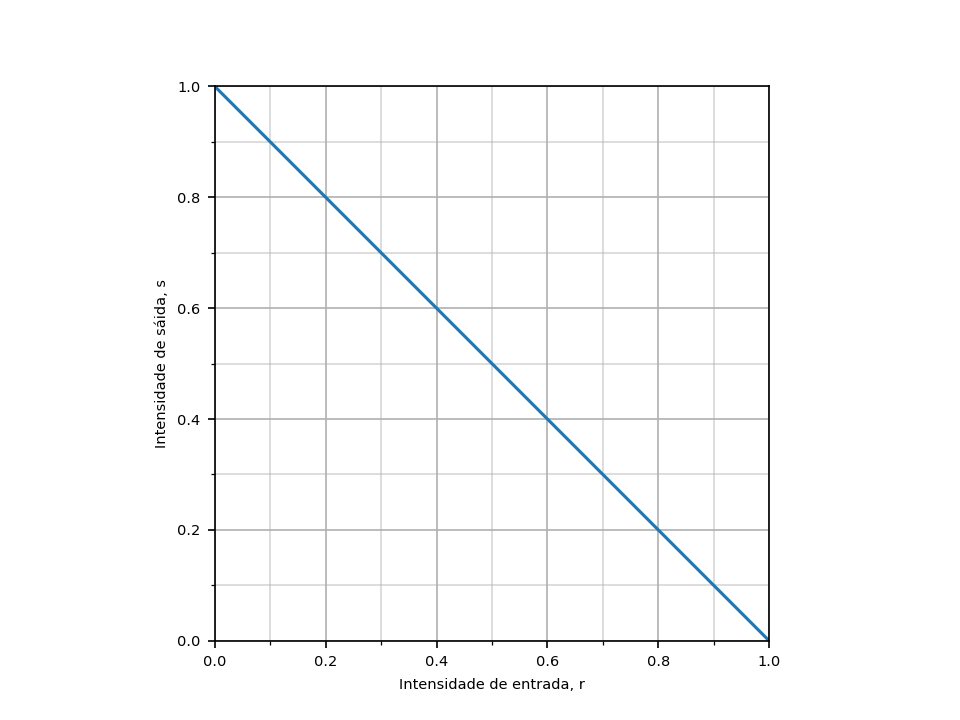

In [12]:
fig = plt.figure()
plt.plot(r, 1. - r)
    
plt.autoscale(enable=True, axis='both', tight=True)
ax = fig.gca()
ax.set_xticks(np.arange(0, 1.1, 0.2))
ax.set_xticks(np.arange(0, 1.1, 0.1), minor=True)
ax.set_yticks(np.arange(0, 1.1, 0.2), minor=False)
ax.set_yticks(np.arange(0, 1.1, 0.1), minor=True)
ax.set_aspect('equal')
ax.grid(which='major', alpha=1.0)
ax.grid(which='minor', alpha=0.5)
ax.set_ylim(0, 1)
ax.set_xlabel('Intensidade de entrada, r', fontsize='medium')
ax.set_ylabel('Intensidade de sáida, s', fontsize='medium')
plt.show()

In [13]:
img_gray_float = util.img_as_float(img_gray)

In [14]:
img_neg = 1. - img_gray_float

In [15]:
# Compute histograms
hist, bins = np.histogram(img_gray_float, bins=256, range=(0, 1))
hist_norm = hist / (img_gray.shape[0] * img_gray.shape[1])

hist_neg, bins_neg= np.histogram(img_neg, bins=256, range=(0, 1))
hist_neg_norm = hist_neg / (img_neg.shape[0] * img_neg.shape[1])

<IPython.core.display.Javascript object>


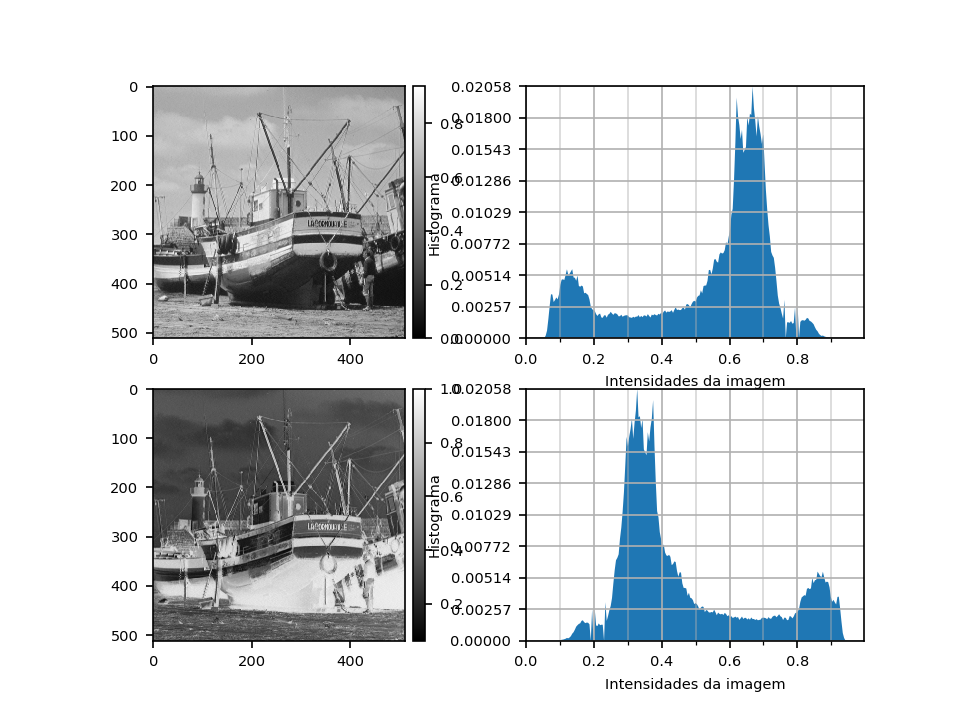

In [16]:
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2,2)
im_0 = ax1.imshow(img_gray_float, cmap='gray')
# Barra de cores
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_0, cax=cax)

im_1 = ax2.imshow(img_neg, cmap='gray')
# Barra de cores
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_1, cax=cax)

ch_0 = ax3.fill_between(bins[:-1], hist_norm)
ax3.autoscale(enable=True, axis='both', tight=True)
#ax = fig.get_gca()
ax3.set_xticks(np.arange(0, 1, 0.2))
ax3.set_xticks(np.arange(0, 1, 0.1), minor=True)
ax3.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/8), minor=False)
ax3.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/4), minor=True)
#ax.set_aspect('equal')
ax3.grid(which='major', alpha=1.0)
ax3.grid(which='minor', alpha=0.5)
ax3.set_ylim(0, hist_norm.max())
ax3.set_xlabel('Intensidades da imagem', fontsize='medium')
ax3.set_ylabel('Histograma', fontsize='medium')

ch_1 = ax4.fill_between(bins[:-1], hist_neg_norm)
ax4.autoscale(enable=True, axis='both', tight=True)
#ax = fig.get_gca()
ax4.set_xticks(np.arange(0, 1, 0.2))
ax4.set_xticks(np.arange(0, 1, 0.1), minor=True)
ax4.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/8), minor=False)
ax4.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/4), minor=True)
#ax.set_aspect('equal')
ax4.grid(which='major', alpha=1.0)
ax4.grid(which='minor', alpha=0.5)
ax4.set_ylim(0, hist_norm.max())
ax4.set_xlabel('Intensidades da imagem', fontsize='medium')
ax4.set_ylabel('Histograma', fontsize='medium')

plt.show()

# Transformações logarítmicas 

$$s = c \times log(1+r)$$

$c$ é uma constante.

In [17]:
r = np.linspace(0, 1, 256)

In [18]:
gain_list = [1., 1.45, 2, 5]

<IPython.core.display.Javascript object>


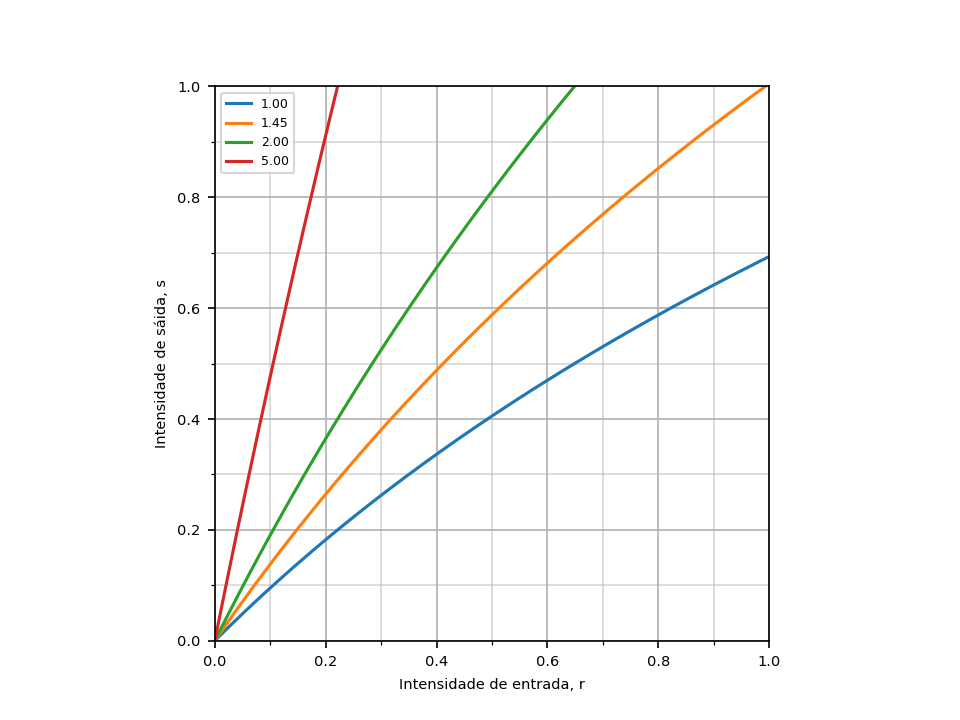

In [19]:
fig = plt.figure()
for gain in gain_list:
    plt.plot(r, gain * np.log(1 + r), label=str('%.2f'%(gain))) # log (log_2, log_10)
    
plt.autoscale(enable=True, axis='both', tight=True)
ax = fig.gca()
ax.set_xticks(np.arange(0, 1.1, 0.2))
ax.set_xticks(np.arange(0, 1.1, 0.1), minor=True)
ax.set_yticks(np.arange(0, 1.1, 0.2), minor=False)
ax.set_yticks(np.arange(0, 1.1, 0.1), minor=True)
ax.set_aspect('equal')
ax.grid(which='major', alpha=1.0)
ax.grid(which='minor', alpha=0.5)
ax.set_ylim(0, 1)
ax.set_xlabel('Intensidade de entrada, r', fontsize='medium')
ax.set_ylabel('Intensidade de sáida, s', fontsize='medium')
plt.legend(loc="best", fontsize='6')

plt.show()

### EXEMPLO: Transformada de Fourier

In [20]:
img_gray = plt.imread('./images/boat.tif')

# Imprime informações sobre a imagem
print(img_gray.shape, img_gray.dtype, img_gray.min(), img_gray.max())

(512, 512) uint8 0 239


<IPython.core.display.Javascript object>


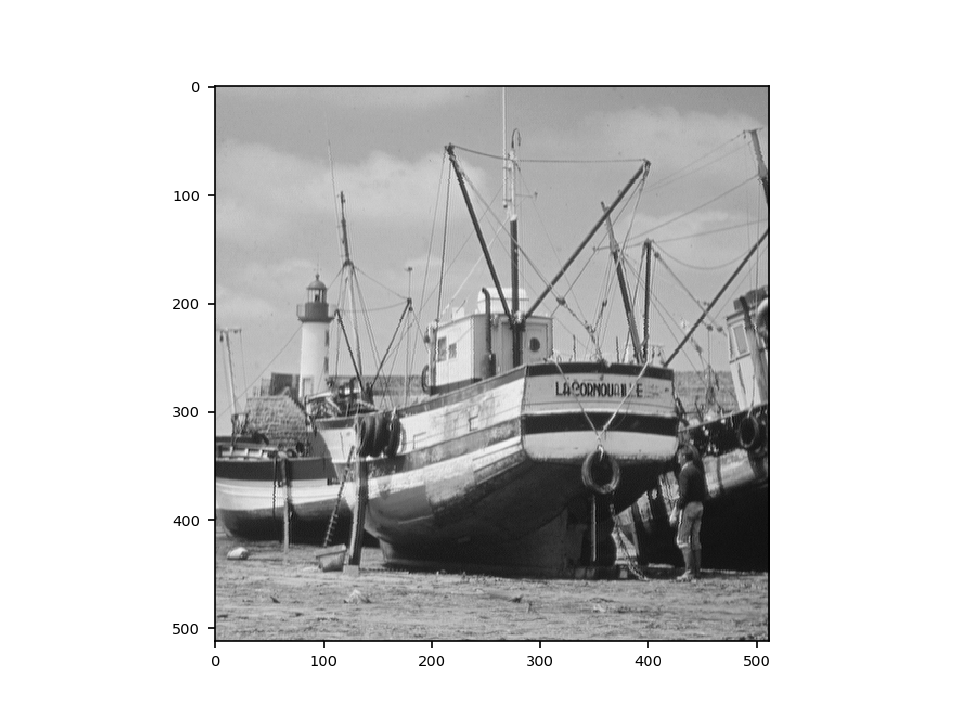

In [21]:
plt.figure()
plt.imshow(img_gray, cmap='gray')

plt.show()

In [22]:
# Calcula a transformada de Fourier da imagem
img_fft = np.fft.fft2(img_gray)
img_fft_sh = np.fft.fftshift(img_fft)

# Computa o espectro de Fourier
img_fft = np.abs(img_fft)
img_fft_sh = np.abs(img_fft_sh)

# Imprime informações sobre as imagens
print(img_fft.shape, img_fft.dtype, img_fft.min(), img_fft.max())
print(img_fft_sh.shape, img_fft_sh.dtype, img_fft_sh.min(), img_fft_sh.max())

(512, 512) float64 2.289763958594397 35684826.0
(512, 512) float64 2.289763958594397 35684826.0


Plota as imagens sem transformação logaritmica

<IPython.core.display.Javascript object>


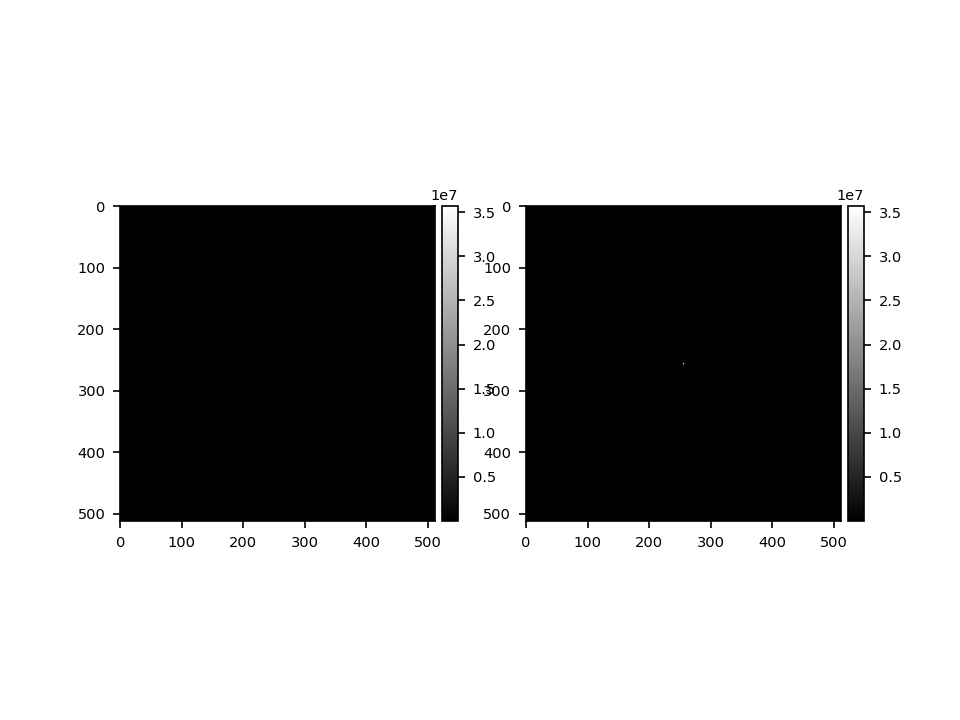

In [23]:
fig, ax = plt.subplots(1, 2)
im_0 = ax[0].imshow(img_fft, cmap='gray')
# Barra de cores
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_0, cax=cax)

im_1 = ax[1].imshow(img_fft_sh, cmap='gray')
# Barra de cores
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_1, cax=cax)

plt.show()

Plota as imagens com tranformação logaritmica

<IPython.core.display.Javascript object>


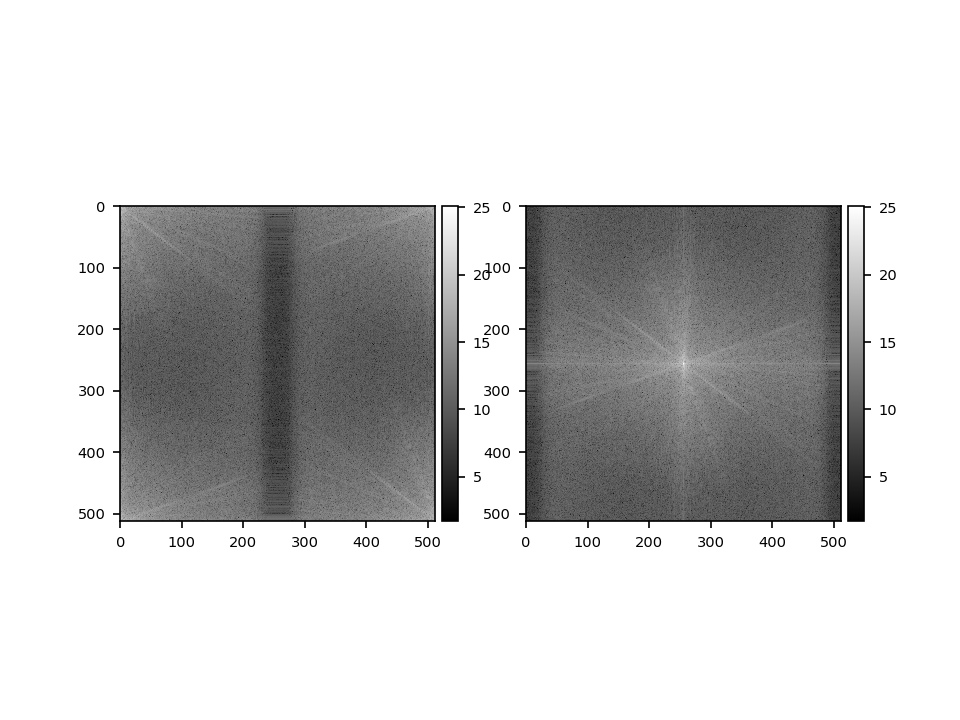

In [24]:
fig, ax = plt.subplots(1, 2)
im_0 = ax[0].imshow(np.log2(1 + img_fft), cmap='gray')
# Barra de cores
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_0, cax=cax)

im_1 = ax[1].imshow(np.log2(1 + img_fft_sh), cmap='gray')
# Barra de cores
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_1, cax=cax)

plt.show()

# Transfomações de potência (gama)

$$s = c \times r^ \gamma$$

$c$ e $\gamma$ são constantes positivas

In [25]:
# Valores menores do que 1
gamma_list = list(np.linspace(0.05, 1, 6))

# Valores maiores do que 1
for i in range(5):
    gamma_list.append(gamma_list[-1] * 2)

<IPython.core.display.Javascript object>


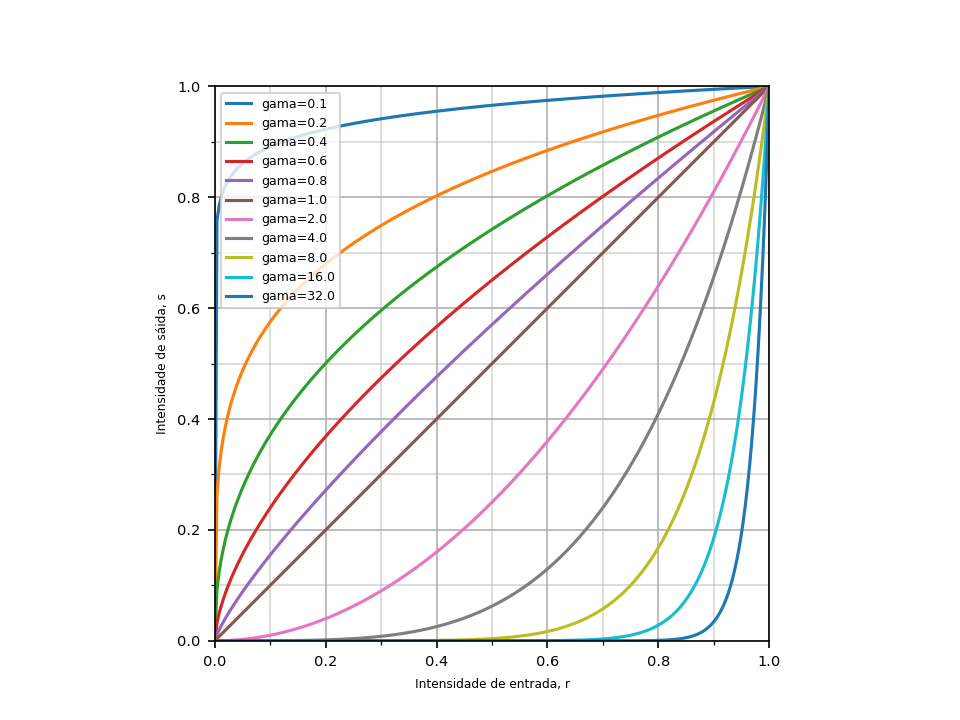

In [26]:
fig = plt.figure()
for g in gamma_list:
    plt.plot(r, r**g, label='gama='+str('%.1f'%(g)))
    
plt.autoscale(enable=True, axis='both', tight=True)
ax = fig.gca()
ax.set_xticks(np.arange(0, 1.1, 0.2))
ax.set_xticks(np.arange(0, 1.1, 0.1), minor=True)
ax.set_yticks(np.arange(0, 1.1, 0.2), minor=False)
ax.set_yticks(np.arange(0, 1.1, 0.1), minor=True)
ax.set_aspect('equal')
ax.grid(which='major', alpha=1.0)
ax.grid(which='minor', alpha=0.5)
ax.set_ylim(0, 1)
ax.set_xlabel('Intensidade de entrada, r', fontsize='small')
ax.set_ylabel('Intensidade de sáida, s', fontsize='small')
plt.legend(loc="best", fontsize='6')

plt.show()

#### EXEMPLO: Aplicação de transformação gama

In [27]:
img_gray = plt.imread('./images/boat.tif')

# Imprime informações sobre a imagem
print(img_gray.shape, img_gray.dtype, img_gray.min(), img_gray.max())

(512, 512) uint8 0 239


In [28]:
# Converte imagem para float

img_gray_float = util.img_as_float(img_gray)

# Imprime informações sobre a imagem
print(img_gray_float.shape, img_gray_float.dtype, img_gray_float.min(), img_gray_float.max())

(512, 512) float64 0.0 0.9372549019607843


$\gamma = 0.2$

In [29]:
# Define o valor do gama
gama = 0.2

# Transformação gama
img_gama_02 = img_gray_float ** gama

# Computa os histogramas
hist_gama_02, bins_gama_02 = np.histogram(img_gama_02, bins=256, range=(0, 1))
hist_gama_02_norm = hist_gama_02 / (img_gama_02.shape[0] * img_gama_02.shape[1])

$\gamma = 4.0$

In [30]:
# Define o valor do gama
gama = 4.

# Transformação gama
img_gama_40 = img_gray_float ** gama

# Computa os histogramas
hist_gama_40, bins_gama_40 = np.histogram(img_gama_40, bins=256, range=(0, 1))
hist_gama_40_norm = hist_gama_40 / (img_gama_40.shape[0] * img_gama_40.shape[1])

### print("%.4f" % (hist_gama_40_norm[0]))

Plota as images na tela

<IPython.core.display.Javascript object>


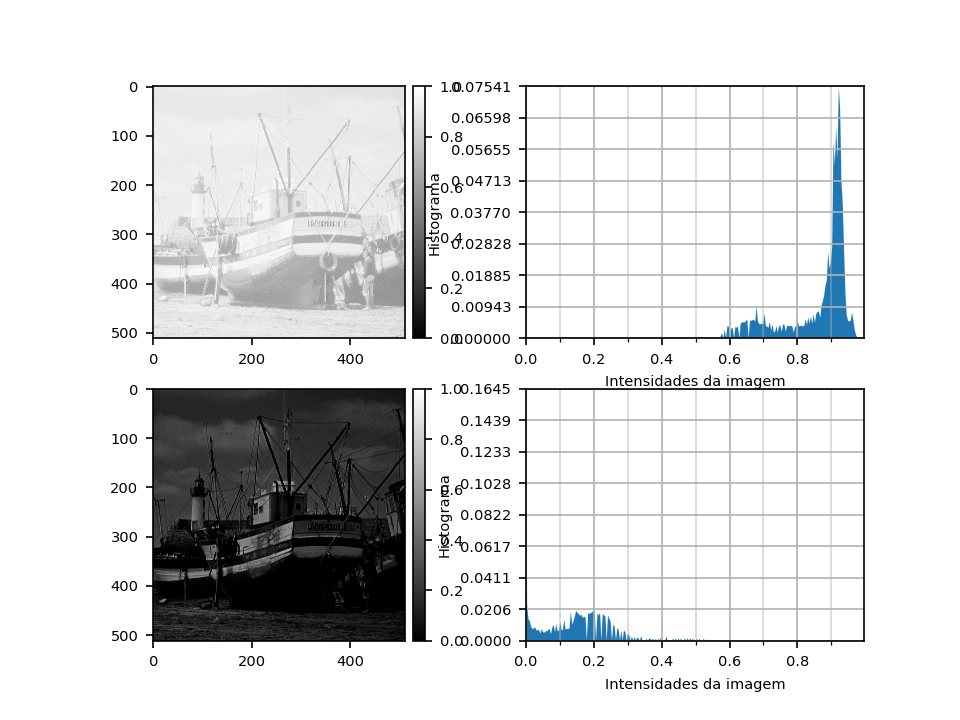

In [31]:
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2,2)
im_0 = ax1.imshow(img_gama_02, cmap='gray', vmin=0, vmax=1)
# Barra de cores
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_0, cax=cax)

im_1 = ax2.imshow(img_gama_40, cmap='gray', vmin=0, vmax=1)
# Barra de cores
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im_1, cax=cax)

ch_0 = ax3.fill_between(bins_gama_02[:-1], hist_gama_02_norm)
ax3.autoscale(enable=True, axis='both', tight=True)
#ax = fig.get_gca()
ax3.set_xticks(np.arange(0, 1, 0.2))
ax3.set_xticks(np.arange(0, 1, 0.1), minor=True)
ax3.set_yticks(np.arange(0, hist_gama_02_norm.max()+0.01, hist_gama_02_norm.max()/8), minor=False)
ax3.set_yticks(np.arange(0, hist_gama_02_norm.max()+0.01, hist_gama_02_norm.max()/4), minor=True)
#ax.set_aspect('equal')
ax3.grid(which='major', alpha=1.0)
ax3.grid(which='minor', alpha=0.5)
ax3.set_ylim(0, hist_gama_02_norm.max())
ax3.set_xlabel('Intensidades da imagem', fontsize='medium')
ax3.set_ylabel('Histograma', fontsize='medium')

ch_1 = ax4.fill_between(bins_gama_40[:-1], hist_gama_40_norm)
ax4.autoscale(enable=True, axis='both', tight=True)
#ax = fig.get_gca()
ax4.set_xticks(np.arange(0, 1, 0.2))
ax4.set_xticks(np.arange(0, 1, 0.1), minor=True)
ax4.set_yticks(np.arange(0, hist_gama_40_norm.max()+0.01, hist_gama_40_norm.max()/8), minor=False)
ax4.set_yticks(np.arange(0, hist_gama_40_norm.max()+0.01, hist_gama_40_norm.max()/4), minor=True)
#ax.set_aspect('equal')
ax4.grid(which='major', alpha=1.0)
ax4.grid(which='minor', alpha=0.5)
ax4.set_ylim(0, hist_gama_40_norm.max())
ax4.set_xlabel('Intensidades da imagem', fontsize='medium')
ax4.set_ylabel('Histograma', fontsize='medium')

plt.show()

# Referencias

MARQUES FILHO, O.; VIEIRA NETO, H. Processamento digital de imagens. Brasport, 1999.

    Disponível para download no site do autor (Exclusivo para uso pessoal)

    http://dainf.ct.utfpr.edu.br/~hvieir/pub.html  

GONZALEZ, R.C.; WOODS, R.E.; Processamento Digital de Imagens. 3ª edição. Editora Pearson, 2009.

    Disponível na Biblioteca Virtual da Pearson.

J. E. R. Queiroz, H. M. Gomes. Introdução ao Processamento Digital de Imagens. RITA. v. 13, 2006.

    http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2016.2/Rita-Tutorial-PDI.pdf  

Universidade de Waterloo. Image Repository.
    http://links.uwaterloo.ca/Repository.html